#  Breast Cancer Diagnosis via Logistic Regression

In this demo, we will see how to visualize training data for classification, plot the logistic function and perform logistic regression.  As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration.  The goal is to detect if the cells are benign or malignant.

## Loading and Visualizing the Data

We first load the packages as usual.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

Next, we load the data.  It is important to remove the missing values.

In [2]:
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)

df.head(6)

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          699 non-null    int64  
 1   thick       699 non-null    int64  
 2   size_unif   699 non-null    int64  
 3   shape_unif  699 non-null    int64  
 4   marg        699 non-null    int64  
 5   cell_size   699 non-null    int64  
 6   bare        683 non-null    float64
 7   chrom       699 non-null    int64  
 8   normal      699 non-null    int64  
 9   mit         699 non-null    int64  
 10  class       699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


We see that one feature, *bare*, has only a few missing values. We will drop these rows.

In [4]:
# Dropping rows with missing values
df = df.dropna()

## Create train/test split

In [5]:
# Get the response.  Convert to a zero-one indicator 
yraw = np.array(df['class'])
BEN_VAL = 2   # value in the 'class' label for benign samples
MAL_VAL = 4   # value in the 'class' label for malignant samples
y = (yraw == MAL_VAL).astype(int)

#For plotting, we will collect which indexes are for each class
Iben = (y==0)
Imal = (y==1)



## We will use the entire data set in the next examples to build motivation for logisitic regression

In [6]:
# Get two predictors
xnames =['size_unif','marg'] 
X = np.array(df[xnames])

After loading the data, we can create a scatter plot of the data labeling the class values with different colors.  We will pick two of the features.  

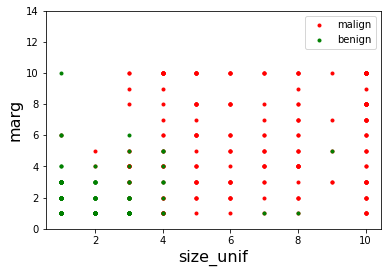

In [7]:

# Create the scatter plot
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')

The above plot is not informative, since many of the points are on top of one another.  Thus, we cannot see the relative frequency of points.  

One way to improve the plot is to draw circles on each point whose size is proportional to the count of samples at that point.  We will re-use this code, so we define a function. 

<module 'matplotlib.pyplot' from '/Users/lindasellie/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

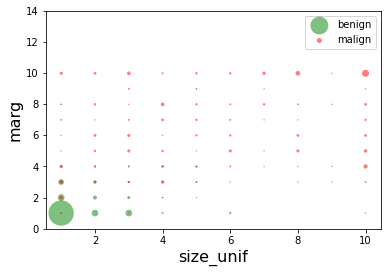

In [8]:
def plot_cnt(X,y):
    
    # Compute the bin edges for the 2d histogram
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e= np.hstack((x0val,np.max(x0val)+1))
    x1e= np.hstack((x1val,np.max(x1val)+1))

    # Make a plot for each class
    yval = list(set(y))
    color = ['g','r']
    for i in range(len(yval)):
        I = np.where(y==yval[i])[0]
        cnt, x0e, x1e = np.histogram2d(X[I,0],X[I,1],[x0e,x1e])
        x0, x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*cnt.ravel(),alpha=0.5,
                    c=color[i],edgecolors='none')
    plt.ylim([0,14])
    plt.legend(['benign','malign'], loc='upper right')
    plt.xlabel(xnames[0], fontsize=16)
    plt.ylabel(xnames[1], fontsize=16)
    return plt

plot_cnt(X,y)

## Try at home exercise

Based on the above plot, what would be a good "classifer" using the two features.  That is, write a function that makes a prediction `yhat` of the class label `y`.  Code up your classifier function.  Measure the accuracy of the classifier on the data.  What percentage error does your classifier get?

In [9]:
# TODO

## Some Simple Classification ideas

Here are some ideas for classification that you may have already thought of.  We can see that the benign samples are located in the lower left.  So, one simple classification rule is to define the region with a line.  We plot the region for one possible line with the following code.

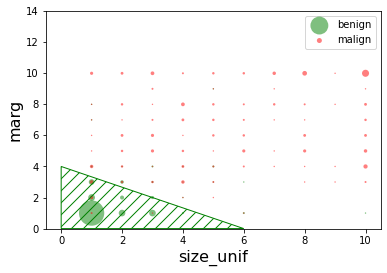

In [10]:
from matplotlib import patches
plt = plot_cnt(X,y)

ax = plt.gca() 
ax.add_patch(
    patches.Polygon([[0,0],[0,4],[6,0]],
        color='green',
        fill=False, hatch = '//'
    )
)

Here is an alternate classification rule based on two linear constraints.

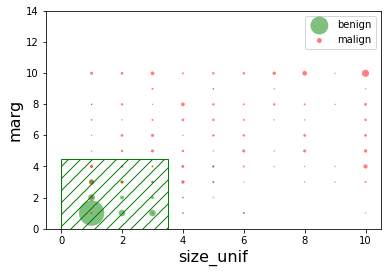

In [11]:
plt = plot_cnt(X,y)
ax = plt.gca()
ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        width=3.5, height=4.5,  color='green',
        fill=False, hatch = '//'
    )
)

## Logistic Functions


This demo illustrate an important classifier known as *logistic regression*.  In logistic regression, we do not just output an estimate of the class label, `yhat`.  Instead, we ouput a *probability*, an estimate of how likely the sample is one class or the other.  That is our output is a number from 0 to 1 representing the likelihood:
$$
    P(y = 1|x)
$$
which is our estimate of the probability that the sample is one class (in this case, a malignant sample) based on the features `x`.  This is sometimes called a *soft classifier*.  

In logistic regression, we assume that likelihood is of the form
$$
    P(y=1|x) = \sigma(z),  \quad z = w_0 + w_1x_1 + \cdots + w_kx_k,  
$$
where $w_0,\ldots,w_k$ are the classifier weights and $\sigma(z)$ is the so-called *logistic* function:
$$
    \sigma(z) = \frac{1}{1+e^{-z}}.
$$

To understand the logistic function, suppose $x$ is a scalar and samples $y$ are drawn with $P(y=1|x) = \sigma(w_1x)$ for some scaling constant $w_1$.  We plot these samples for different $w_1$.

In [12]:
import numpy as np
w1 = 0.5
xm = 10
nx = 100
x  = np.random.uniform(-xm,xm,nx)
py = 1/(1+np.exp(-w1*x)) # sigmoid with z = -w1*x
print(py[0:10])
print(np.random.rand(nx)[0:10])
print((np.random.rand(nx) < py)[0:10])

[0.90772213 0.97338649 0.99239741 0.3668071  0.07900309 0.98519307
 0.18997811 0.98431123 0.7354969  0.98962912]
[0.2049737  0.74167694 0.90477485 0.66148211 0.29871253 0.16224407
 0.23730503 0.50429046 0.79306749 0.79452217]
[ True  True  True  True False  True  True  True  True  True]


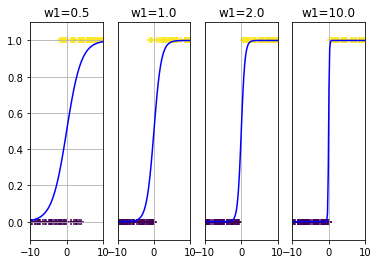

In [13]:
nx = 100
xm = 10
w1s = np.array([0.5,1,2,10])
nplot = w1s.size
iplot = 0
for w1 in w1s:
    iplot += 1 # index for where to put the plot
    x  = np.random.uniform(-xm,xm,nx) # create a numpy array with parameters(lower bound, upper bound, size)
    plt.subplot(1,nplot,iplot)  #tells where to put the plot
    py = 1/(1+np.exp(-w1*x)) # sigmoid with z = -w1*x
    yp = np.array(np.random.rand(nx) < py) #np.random.rand creates nx random numbers in [0,1] uniform dist.
    xp = np.linspace(-xm,xm,100) # 100 items equally spaced from -10 to 10
    pyp = 1/(1+np.exp(-w1*xp)) # sigmoid of equally spaced items where z=w1*xp

    plt.scatter(x,yp,c=yp,edgecolors='none',marker='+')
    plt.plot(xp,pyp,'b-') # plot of sigmoid function 
    plt.axis([-xm,xm,-0.1,1.1])
    plt.grid()
    if (iplot > 1):
        plt.yticks([])
    plt.xticks([-10,0,10])
    plt.title('w1={0:.1f}'.format(w1))


We see that $\sigma(w_1x)$ represents the probability that $y=1$.  The function $\sigma(w_1x) > 0.5$ for $x>0$ meaning the samples are more likely to be $y=1$.  Similarly, for $x<0$, the samples are more likely to $y=0$.  The scaling $w_1$ determines how fast that transition is.

## Fitting the Logistic Model

In a logistic model, we must fit the weights $w_0,w_1,\ldots,w_k$ in the model 
$$
    P(y=1|x) = \sigma(z),  \quad z = w_0 + w_1x_1 + \cdots + w_kx_k,  
$$
The `sklearn` module has very good routines for fitting this model.  First we get the training data and samples.  We will standardize the `X` values to make more sense of the slope values. To learn more see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [14]:
xnames = ['thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit']
X = np.array(df[xnames]) # X now contains all the features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#default is 1/4 test

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Next, we create a logistic regression object. By default, the logistic regresssion object will use $L2$ regularization.  Here we have selected not to have regularization by using *penalty='none'*.  If regularization is used, the parameter `C` states the level of regularization. Higher values of `C` have `less` regularization.    We can chose to set explicity the regularization,  or have the optimal value determined for us.

Note that $\lambda = 1/C$.

In [15]:
logreg = linear_model.LogisticRegression(penalty='none')

Then, we fit the model.

In [16]:
logreg.fit(X_train, y_train)

LogisticRegression(penalty='none')

We can next compute the accuracy on the test data. Why are we not using the training data?

In [17]:
yhat = logreg.predict(X_test)# the predict method will return 0 or 1
acc = np.mean(yhat == y_test)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.947368


It is also useful to print the weights for each feature.  We can use the `pandas` package to make a table. 

In [18]:
print(logreg.intercept_)
W=logreg.coef_
data = {'feature': xnames, 'slope': np.squeeze(W)}
dfslope = pd.DataFrame(data=data)
dfslope

[-1.35419454]


,feature,slope
0,thick,1.194634
1,size_unif,0.260756
2,shape_unif,0.839409
3,marg,0.615559
4,cell_size,0.592045
5,bare,1.601667
6,chrom,0.843135
7,normal,0.740983
8,mit,0.340539


In [19]:
# For the test data we can see the number of tpr, fpr, fnr, and tnr in the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat, y_test)

array([[103,   5],
       [  4,  59]])

## Cross-Validation

  We perform 4-fold cross-validation and print average precision, recall, f1-score and accuracy.


In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

X_unscaled = scaler.inverse_transform(X_train)
nfold = 10
kf = KFold(n_splits=nfold)
prec = []
rec = []
f1 = []
acc = []

for train, test in kf.split(X_unscaled):            
    # Get training and test data
    Xtr = X_unscaled[train,:]
    ytr = y_train[train]
    Xts = X_unscaled[test,:]
    yts = y_train[test]
      
    scaler_KFold = StandardScaler()
    Xtr= scaler_KFold.fit_transform(Xtr)
    Xts = scaler_KFold.transform(Xts)
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)



print('Precision = {0:.4f}'.format(precm))
print('Recall =    {0:.4f}'.format(recm))
print('f1 =        {0:.4f}'.format(f1m))
print('Accuracy =  {0:.4f}'.format(accm))

Precision = 0.9573
Recall =    0.9431
f1 =        0.9482
Accuracy =  0.9648


## ROC curve

As discussed above, the logistic classifier outputs a *soft* classification $P(y=1|x)$.  One simple idea is to select the class label $\hat{y}=1$ whenever $P(y=1|x) > 0.5$.  However, one can also set $\hat{y}=1$ whenever $P(y=1|x) > t$ for some threshold $t$.  Using higher thresholds values selects $\hat{y}=0$ more often which results in fewer *false alarms*, but also many *missed detections* (reduces sensitivity).  Similarly, lower thresholds values selects $\hat{y}=1$ more often which results in fewer *missed detections* (increases *sensitivity*) but also more *false alarms*.  The ROC curve displays this  tradeoff by graphing the *true positive rate* vs. *false positive rate* obtained with different $t$.  

The ROC curve can be plotted in the `sklearn` package with the following code.

(0.0, 0.1)

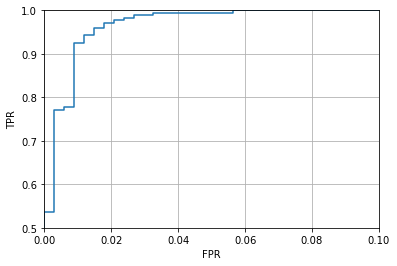

In [21]:
from sklearn import metrics
yprob = logreg.predict_proba(X_train)#predicts the probability of 0 and the probability of 1

fpr, tpr, thresholds = metrics.roc_curve(y_train,yprob[:,1]) # compute fpr,tpr for different threaholds
#Decreasing thresholds on the decision function used to compute fpr and tpr. 
#thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.print(thresholds)
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1])
plt.xlim([0,0.1])

Now let us see what are the relation between the threshold and the TPR and FPR.

Text(0.5, 0, 'Threshold')

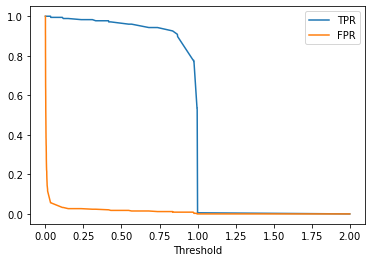

In [22]:
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')

The goodness of a classification method is often measured by the area under the curve (AUC), which is independent of the threshold. A method with a higher AUC means that under the same FPR, it has higher PPR. Note that in practice, you should evalute UAC in different cross validation folds and then evaluate the mean AUC.

In [23]:
auc=metrics.roc_auc_score(y_train,yprob[:,1])
print("AUC=%f" % auc)

AUC=0.996371


## LASSO regularization
As with linear regression, we can use LASSO regression to force the weighting coefficients to have small L1 norm, which will have the effect to reducing the number of non-zero coefficients. This is particularly important when there are many features and not enough training samples. the LogisticRegression method of sklearn allows one to add a regularization term (penalty), which could be either L2 or L1 norm. By setting the penalty to l1, you are effectively using LASSO regularization. The parameter C is inversely related to the regularization level. You can observe that as you reduces C, you will get fewer and fewer non-zero coefficients. To determine the appropriate C, we will use cross validation. Note that with the current example, we have sufficient number of samples for the number of features, so we do not expect to see the benefit of LASSO regression. First let us determine the C value leading to the minimum error rate (1-accuracy). We also count the number of non-zero coefficients.

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
The minimum test error rate =   2.7338e-02, SE=  7.2695e-03
The C value corresponding to minimum error =   2.6367e-02


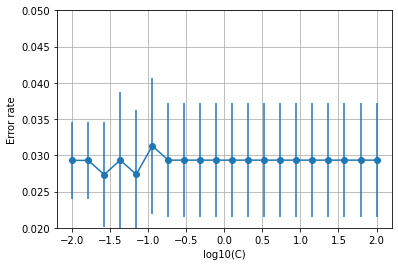

In [24]:
npen = 20
C_test = np.logspace(-2,2,npen)

X_unscaled = scaler.inverse_transform(X_train)
# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))
# Create the logistic regression object
logreg = linear_model.LogisticRegression(solver='liblinear', penalty='l1',warm_start=True)

# Loop over the folds in the cross-validation
for ifold, Ind in enumerate(kf.split(X_unscaled)):        
            
    # Get training and test data
    Itr, Its = Ind
    Xtr = X_train[Itr,:]
    ytr = y_train[Itr]
    Xts = X_train[Its,:]
    yts = y_train[Its]
    
    scaler_KFold = StandardScaler()
    Xtr= scaler_KFold.fit_transform(Xtr)
    Xts = scaler_KFold.transform(Xts)
    
    # Loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Xtr, ytr)
    
        # Predict the labels on the test set.
        yhat = logreg.predict(Xts)
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)
    print("Fold %d" % ifold)
    
err_mean = np.mean(err_rate, axis=1)
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.02,0.05])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))



Now let us find the optimal C using one standard error rule. Note that because C is inversely related to the regularization strength, we want to find the minimal C that satisfies the error criterion. We will also find the corresponding test accuracy with this optimal C, and compare with the test accuracy without regularization.

In [25]:
err_tgt = err_mean[imin] + err_se[imin]
iopt = np.where(err_mean < err_tgt)[0][0]
C_opt = C_test[iopt]

print("Optimal C=%12.4e" % C_opt)
print("The test error rate = %12.4e, SE=%12.4e" % (err_mean[iopt], err_se[iopt]))

print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(1-err_mean[iopt], err_se[iopt]))

Optimal C=  1.0000e-02
The test error rate =   2.9299e-02, SE=  5.2623e-03
Accuracy =  0.9707, SE=0.0053


Now plot the nubmer of non-zero coefficients for the first class for different C values. Also determine and print the number of non-zero coefficients corresponding to C_opt.

The number of non-zero coefficients for the optimal C = 3.000000


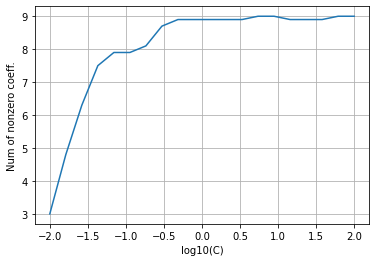

In [26]:
num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
plt.plot(np.log10(C_test),num_nonzerocoef_mean)

plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Num of nonzero coeff.')

print("The number of non-zero coefficients for the optimal C = %f" % num_nonzerocoef_mean[iopt])

For the optimal `C`, fit the model on the entire training data with l1 regularization. Find the resulting weight matrix, `W_l1`.  Plot the first row of this weight matrix and compare it to the first row of the weight matrix without the regularization.  You should see that, with l1-regularization, the weight matrix is much more sparse. Please also compare the accuracy for the training data using optimal `C` with the previous results not using LASSO regularization.

In [27]:
logreg = linear_model.LogisticRegression(solver='liblinear',C=C_opt, penalty='l1')
print("The amount of regularization:",logreg.C)

logreg.fit(X_train,y_train)
yhat = logreg.predict(X_test)
acc = np.mean(yhat == y_test)
print('Accuracy on the test data is {0:f}'.format(acc))
W_l1 = logreg.coef_

data = {'feature': xnames, 'slope': np.squeeze(W_l1)}
dfslope = pd.DataFrame(data=data)
dfslope

The amount of regularization: 0.01
Accuracy on the test data is 0.935673


,feature,slope
0,thick,0.000000
1,size_unif,0.434886
2,shape_unif,0.192687
3,marg,0.000000
4,cell_size,0.000000
5,bare,0.484337
6,chrom,0.000000
7,normal,0.000000
8,mit,0.000000


 Note that actual results vary each time you run, because the optimal C depends on the cross validation split, which is random. When the number of samples is small relative to the number of features, more and consistant gain is expected.
 
 You can also use Sklearn's method to find the optimal amount of regularization

In [28]:
logreg_lasso = linear_model.LogisticRegression(solver='liblinear', C=0.02, penalty='l1')
logreg_lasso.fit(X_train,y_train)
yhat = logreg_lasso.predict(X_test)
acc = np.mean(yhat == y_test)

print("The regularization parameter:", logreg_lasso.C)
print('Accuracy on the test data is {0:f}'.format(acc))
W_l1 = logreg_lasso.coef_


data = {'feature': xnames, 'slope': np.squeeze(W_l1)}
dfslope = pd.DataFrame(data=data)
dfslope

The regularization parameter: 0.02
Accuracy on the test data is 0.941520


,feature,slope
0,thick,0.056292
1,size_unif,0.676905
2,shape_unif,0.329667
3,marg,0.000000
4,cell_size,0.000000
5,bare,0.822093
6,chrom,0.075406
7,normal,0.178737
8,mit,0.000000


Comparing the different models

Text(0.5, 1.0, 'l1-regularization')

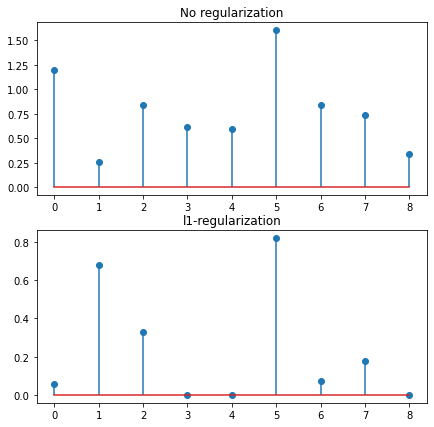

In [29]:

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(W[0,:])#
plt.title('No regularization')
plt.subplot(2,1,2)
plt.stem(W_l1[0,:])
plt.title('l1-regularization')



In [30]:
logreg_ridge = linear_model.LogisticRegression(solver='liblinear', C=1, penalty='l2')
logreg_ridge.fit(X_train,y_train)
yhat = logreg_ridge.predict(X_test)
acc = np.mean(yhat == y_test)

print("The regularization parameter:", logreg_ridge.C)
print('Accuracy on the test data is {0:f}'.format(acc))
W_l1 = logreg_ridge.coef_


data = {'feature': xnames, 'slope': np.squeeze(W_l1)}
dfslope = pd.DataFrame(data=data)
dfslope

The regularization parameter: 1
Accuracy on the test data is 0.947368


,feature,slope
0,thick,0.968363
1,size_unif,0.440666
2,shape_unif,0.747149
3,marg,0.555386
4,cell_size,0.546785
5,bare,1.423173
6,chrom,0.752109
7,normal,0.683307
8,mit,0.361392
